<a href="https://colab.research.google.com/github/Benjohn2001/The-Office-Predictor/blob/main/The_Office_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sn
from sklearn.metrics import confusion_matrix


#Initial importing of data
parentURL = 'https://raw.githubusercontent.com/Benjohn2001/The-Office-Predictor/main/parent_reply.csv'
talkingURL = 'https://raw.githubusercontent.com/Benjohn2001/The-Office-Predictor/main/talking_head.csv'
parentDS = pd.read_csv(parentURL)
talkingDS = pd.read_csv(talkingURL)

#Drop the columns that are not needed
#Rename reply to quote so both datasets have matching column names
#Combine both the datasets and use reset_index with drop true to reset indexes
#and discard the old indexes, all data is now combined
#We have 27899 quotes when combined
talkingDS=talkingDS.drop(columns=['quote_id'])
parentDS=parentDS.drop(columns=["parent_id", "parent"])
parentDS=parentDS.rename(columns={'reply': 'quote'})
combinedDS = pd.concat([parentDS, talkingDS]).reset_index(drop=True)

#Remove quotes of length less than 5, removing 10575 quotes, now 17324 quotes 
#Specification has limit of 10000 samples so now random sample to 10000
i=0
for item in combinedDS['quote'].values:
    if(len(item.split())<5):
        combinedDS=combinedDS.drop(i,axis=0)
    i=i+1

# Initially used this but dataset was too weighted towards michael so now even representation
# sampled = combinedDS.sample(n=10000).reset_index(drop=True)

In [2]:
michaelQ=combinedDS[combinedDS['character']=='Michael'].sample(n=2500)
print(len(michaelQ))
dwightQ=combinedDS[combinedDS['character']=='Dwight'].sample(n=2500)
print(len(dwightQ))
jimQ=combinedDS[combinedDS['character']=='Jim'].sample(n=2500)
print(len(jimQ))
pamQ=combinedDS[combinedDS['character']=='Pam'].sample(n=2500)
print(len(pamQ))
sampled=pd.concat([michaelQ,dwightQ,jimQ,pamQ]).sample(frac=1).reset_index(drop=True)
print(sampled.head)

2500
2500
2500
2500
<bound method NDFrame.head of                                                   quote character
0                         I do! I do. I do. I do. I do.    Dwight
1                        You have to settle down first.       Pam
2     Nellie, why don’t you tell Dwight what we were...       Pam
3     “The uterus contracts after your egg passes th...    Dwight
4            Oh, it’s… In the backyard. I’ll take this.    Dwight
...                                                 ...       ...
9995                          Near near near near near!    Dwight
9996  Okay, so, we do the restaurant thing and then…...   Michael
9997  I’ll call you, too. So. You are probably gonna...   Michael
9998                             Mm. Hey. Oh, hi, Gabe.       Pam
9999           Erin, back row. Ryan, you move up a row!    Dwight

[10000 rows x 2 columns]>


In [3]:
#Split dataset in 60% training, 20% validation, and 20% test
trainDS, validationDS = train_test_split(sampled, test_size=0.20, random_state=0)
trainDS, testDS = train_test_split(trainDS, test_size=0.25, random_state=0)
trainDS=trainDS.reset_index(drop=True)
validationDS=validationDS.reset_index(drop=True)
testDS=testDS.reset_index(drop=True)

print(trainDS.head())

                                               quote character
0             I’m not familiar with that expression,    Dwight
1  Oh, God, you know what? I’m gonna be in Mexico...   Michael
2  Ahh, I love staring off in one direction. If I...       Jim
3                          Welcome to the club, pig!    Dwight
4  Jim, what if we both lose our jobs? I’m trying...       Pam


In [4]:
sampledCounts=sampled['character'].value_counts()
trainCounts=trainDS['character'].value_counts()
validationCounts=validationDS['character'].value_counts()
testCounts=testDS['character'].value_counts()

tableDataCount={
    'Dataset':['Initial', 'Train', 'Validation', 'Test'],
    'Michael':[sampledCounts['Michael'],trainCounts['Michael'],validationCounts['Michael'],testCounts['Michael']],
    'Dwight':[sampledCounts['Dwight'],trainCounts['Dwight'],validationCounts['Dwight'],testCounts['Dwight']],
    'Jim':[sampledCounts['Jim'],trainCounts['Jim'],validationCounts['Jim'],testCounts['Jim']],
    'Pam':[sampledCounts['Pam'],trainCounts['Pam'],validationCounts['Pam'],testCounts['Pam']],
}

tableDataPercent={
    'Dataset':['Initial', 'Train', 'Validation', 'Test'],
    'Michael':[str(round(sampledCounts['Michael']/10000*100,2)),str(round(trainCounts['Michael']/6000*100,2)),str(round(validationCounts['Michael']/2000*100,2)),str(round(testCounts['Michael']/2000*100,2))],
    'Dwight':[str(round(sampledCounts['Dwight']/10000*100,2)),str(round(trainCounts['Dwight']/6000*100,2)),str(round(validationCounts['Dwight']/2000*100,2)),str(round(testCounts['Dwight']/2000*100,2))],
    'Jim':[str(round(sampledCounts['Jim']/10000*100,2)),str(round(trainCounts['Jim']/6000*100,2)),str(round(validationCounts['Jim']/2000*100,2)),str(round(testCounts['Jim']/2000*100,2))],
    'Pam':[str(round(sampledCounts['Pam']/10000*100,2)),str(round(trainCounts['Pam']/6000*100,2)),str(round(validationCounts['Pam']/2000*100,2)),str(round(testCounts['Pam']/2000*100,2))],
}

tableFrameCount=pd.DataFrame(tableDataCount)
print('Table displaying the amount of quotes for each character in each dataset\n')
print(tableFrameCount.to_string(index=False))

tableFramePercent=pd.DataFrame(tableDataPercent)
print('\nTable displaying the percentage of character quotes in each dataset\n')
print(tableFramePercent.to_string(index=False))

Table displaying the amount of quotes for each character in each dataset

   Dataset  Michael  Dwight  Jim  Pam
   Initial     2500    2500 2500 2500
     Train     1523    1510 1507 1460
Validation      493     478  497  532
      Test      484     512  496  508

Table displaying the percentage of character quotes in each dataset

   Dataset Michael Dwight   Jim   Pam
   Initial    25.0   25.0  25.0  25.0
     Train   25.38  25.17 25.12 24.33
Validation   24.65   23.9 24.85  26.6
      Test    24.2   25.6  24.8  25.4


In [40]:
#Using the english pipeline we tokenize each quote and add it to the dataframe
#The text_pipeline_spacy function is from the labs
import spacy
from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, compile_infix_regex, compile_suffix_regex
import re

def token(nlp):
    infix = re.compile(r'''[:\—\-\.\...\/\-\…\’]''')
    return Tokenizer(nlp.vocab, 
                     prefix_search=compile_prefix_regex(nlp.Defaults.prefixes).search,
                     suffix_search=compile_suffix_regex(nlp.Defaults.suffixes).search,
                     infix_finditer=infix.finditer,
                     token_match=None
                     )

nlp = spacy.load("en_core_web_sm")
nlp.tokenizer = token(nlp)

a=set()

def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if(not t.is_stop and not t.is_punct and not t.is_space and not t.like_num and not t.is_currency):
            tokens.append(t.lemma_.lower())
            a.add(t.lemma_.lower())
    return tokens

In [41]:
#Vectorise training quotes
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=text_pipeline_spacy)
matrix = vectorizer.fit_transform(trainDS.quote)

In [43]:
print(trainDS.quote)
print(matrix.shape)

mat=matrix.toarray()
print(len(mat))

featureNames=vectorizer.get_feature_names_out()

print(len(vectorizer.vocabulary_))


0       Oh, my God! Look at her! baby, she’s so beauti...
1       It’s only for three weeks, you know with my mo...
2       Well, that’s what they taught me in my 19th ce...
3       I know none of that. If I did, you’d be the la...
4             Dwight, I didn’t poison you. I was kidding.
                              ...                        
5995    Hey, you want me to take the little diaper bla...
5996    I don’t even know how to say this, but Cece is...
5997    No I disagree. “R” is among the most menacing ...
5998    Oh, well. Just use the momentum of your lower ...
5999                  You don’t know what you need. Just…
Name: quote, Length: 6000, dtype: object
(6000, 5669)
6000
5669


In [44]:
#K means clustering functions

def initKBlankArr(k):
    kBlankArr=[]
    for i in range(k):
      kBlankArr.append([])
    return kBlankArr

def getCentInitialForgy(k):
  centroids=[]
  for i in range(k):
    index=np.random.randint(0,len(mat)-1)
    centroids.append(mat[index])
  return centroids

def getCentInitialRandom(k):
  centroids=initKBlankArr(k)
  for item in mat:
    index=np.random.randint(0,k)
    centroids[index].append(item)
  cents=calculateMeans(centroids)
  return cents

def getEuclidDistances(x,centroids):
  dists=[]
  for c in centroids:
    dists.append(np.linalg.norm(np.array(x)-np.array(c)))
  return dists

def getDistances(centroids,k):
  dists=[]
  tokens=initKBlankArr(k)
  sortedRows=initKBlankArr(k)
  for i in range(len(mat)):
    dists=getEuclidDistances(mat[i],centroids)
    sortedRows[np.argmin(dists)].append(mat[i])
    tokens[np.argmin(dists)].append([trainDS.quote[i],np.min(dists),trainDS.character[i]])
  return sortedRows,tokens

def calculateMeans(arr):
  means=[]
  for i in range(len(arr)):
      means.append(np.mean(arr[i], axis=0))
  return means



In [45]:
from copy import deepcopy

def kMeans(k, max_iter):
  i=0
  centroidsWords=initKBlankArr(k)
  oldCentroids=getCentInitialRandom(k)
  centroids=getCentInitialRandom(k)
  while np.not_equal(oldCentroids,centroids).any() and i<max_iter:
    sortedRows, tokens=getDistances(centroids,k)
    lens=[len(i) for i in sortedRows]
    print(lens)
    oldCentroids=deepcopy(centroids)
    centroids=calculateMeans(sortedRows)
    i=i+1
  return sortedRows, tokens

#K means clustering
result, tokens=kMeans(5,100)

[1037, 1533, 1201, 1096, 1133]
[851, 1583, 806, 1721, 1039]
[814, 1188, 660, 2448, 890]
[744, 978, 519, 3021, 738]
[729, 806, 428, 3381, 656]
[717, 714, 395, 3558, 616]
[698, 667, 377, 3666, 592]
[675, 638, 371, 3734, 582]
[643, 605, 369, 3810, 573]
[603, 582, 369, 3877, 569]
[589, 565, 371, 3908, 567]
[579, 558, 371, 3927, 565]
[574, 551, 371, 3941, 563]
[566, 542, 371, 3958, 563]
[565, 532, 370, 3971, 562]
[563, 523, 370, 3982, 562]
[562, 514, 371, 3992, 561]
[561, 509, 371, 3999, 560]
[560, 504, 371, 4005, 560]
[559, 496, 371, 4014, 560]
[560, 487, 371, 4022, 560]
[558, 474, 371, 4037, 560]
[558, 465, 371, 4046, 560]
[558, 460, 371, 4051, 560]
[557, 456, 371, 4056, 560]
[557, 454, 371, 4059, 559]
[557, 448, 371, 4065, 559]
[557, 444, 371, 4069, 559]
[557, 441, 371, 4072, 559]
[557, 437, 371, 4076, 559]
[558, 431, 371, 4081, 559]
[558, 418, 371, 4094, 559]
[558, 402, 371, 4110, 559]
[561, 377, 372, 4131, 559]
[561, 357, 373, 4150, 559]
[558, 342, 372, 4166, 562]
[558, 330, 372, 4178,

In [46]:
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li

sorted=[Sort(x)[:10]for x in tokens]
for item in sorted:
  print(item)

authors=[]
import collections
ind=0
for item in tokens:
  for c in item:
    if c[2] == 'Jim':
      authors.append(0)
    if c[2] == 'Michael':
      authors.append(1)
    if c[2] == 'Dwight':
      authors.append(2)
    if c[2] == 'Pam':
      authors.append(3)
  auths=list(map(lambda x : x[2], item))
  cnt=collections.Counter(auths)
  print(cnt)
  ind=ind+1

[['Yeah, she just went down.', 0.8114667066581351, 'Pam'], ['Yeah, he came and went.', 0.85012404319132, 'Pam'], ['Yeah, I’m not going to talk about this now.', 0.8547178853266844, 'Jim'], ['Yeah, Dwight, here’s how it’s going to go down. You and I-', 0.8558543342780986, 'Michael'], ['No, that’s not… no, that’s not what I was going to say.', 0.8783567827037163, 'Michael'], ['I should really get going.', 0.8783567827037163, 'Pam'], ['And you are not going to, either.', 0.8783567827037163, 'Jim'], ['Yeah, she’s doing really well.', 0.884507489229439, 'Jim'], ['Yeah. Do you want me to take these on my way out?', 0.8880007919834446, 'Jim'], ['I’m not going to make this call.', 0.8895733936178376, 'Michael']]
[['Okay, well you have to show us.', 0.6581064611278583, 'Pam'], ['Okay. What? What is this?', 0.6581064611278583, 'Pam'], ['Well, what does that… is that… okay.', 0.6581064611278583, 'Pam'], ['Okay, you do not have to do this.', 0.6581064611278583, 'Pam'], ['Okay… Seven, one, one, nin

In [9]:
#Taken from labs

def plotConfusionMatrix(labels_val, labels_predicted):
  cm = confusion_matrix(labels_val, labels_predicted)
  colour_map = sn.color_palette("Purples", as_cmap=True)
  labels = ['Dwight', 'Jim','Michael','Pam']
  plot = sn.heatmap(cm, 
                    annot=True,
                    annot_kws={"size": 16},
                    fmt='g', 
                    cmap = colour_map, 
                    cbar = False, 
                    xticklabels=labels,
                    yticklabels=labels)
  plot.set(xlabel='Predicted', ylabel='Actual')
  return plot

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

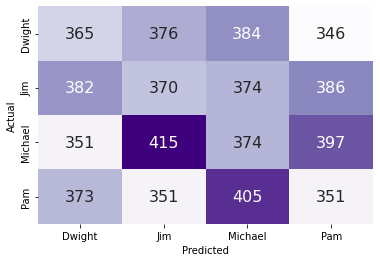

In [48]:
dsCharNumber=[]
for c in trainDS.character:
  if c == 'Jim':
    dsCharNumber.append(0)
  if c == 'Michael':
    dsCharNumber.append(1)
  if c == 'Dwight':
    dsCharNumber.append(2)
  if c == 'Pam':
    dsCharNumber.append(3)

plotConfusionMatrix(dsCharNumber,authors)

Accuracy: 0.246
Precision: 0.062
Recall: 0.250
F1: 0.099


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

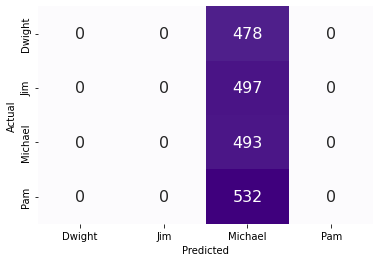

In [13]:
#Q3 Dummy classifier - most frequent

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dummy_mf=DummyClassifier(strategy="most_frequent")
dummy_mf.fit(trainDS.quote, trainDS.character)
labelsPredicted=dummy_mf.predict(validationDS.quote)

accuDMF=accuracy_score(validationDS.character,labelsPredicted)
precDMF=precision_score(validationDS.character,labelsPredicted,average='macro')
reccDMF=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sDMF=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuDMF:.3f}")
print("Precision:",f"{precDMF:.3f}")
print("Recall:",f"{reccDMF:.3f}")
print("F1:",f"{f1sDMF:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

Accuracy: 0.240
Precision: 0.241
Recall: 0.241
F1: 0.240


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

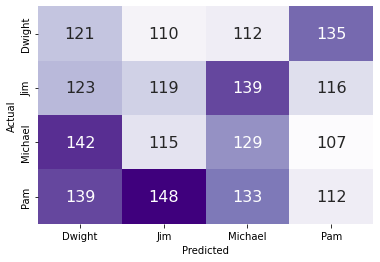

In [14]:
#Q3 Dummy classifier - stratified

dummy_strat=DummyClassifier(strategy="stratified")
dummy_strat.fit(trainDS.quote, trainDS.character)
labelsPredicted=dummy_strat.predict(validationDS.quote)

accuDST=accuracy_score(validationDS.character,labelsPredicted)
precDST=precision_score(validationDS.character,labelsPredicted,average='macro')
reccDST=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sDST=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuDST:.3f}")
print("Precision:",f"{precDST:.3f}")
print("Recall:",f"{reccDST:.3f}")
print("F1:",f"{f1sDST:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

Accuracy: 0.246
Precision: 0.062
Recall: 0.250
F1: 0.099


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

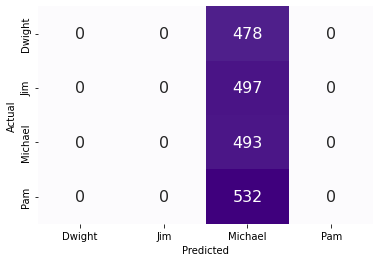

In [15]:
#Q3 - Logistic Regression - One hot

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

ohEncoder = OneHotEncoder(handle_unknown='ignore')
ohLabelsT = ohEncoder.fit_transform(trainDS.quote.array.reshape(-1,1)).toarray()
ohLabelsV = ohEncoder.transform(validationDS.quote.array.reshape(-1,1)).toarray()

logistReg=LogisticRegression(random_state=42).fit(ohLabelsT,trainDS.character)
labelsPredicted=logistReg.predict(ohLabelsV)

accuOHL=accuracy_score(validationDS.character,labelsPredicted)
precOHL=precision_score(validationDS.character,labelsPredicted,average='macro')
reccOHL=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sOHL=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuOHL:.3f}")
print("Precision:",f"{precOHL:.3f}")
print("Recall:",f"{reccOHL:.3f}")
print("F1:",f"{f1sOHL:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

Accuracy: 0.402
Precision: 0.402
Recall: 0.403
F1: 0.402


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

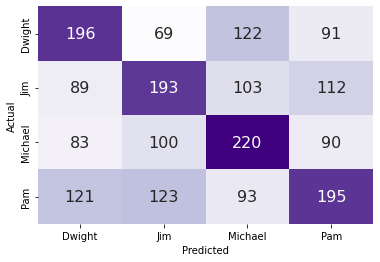

In [16]:
#Q3 - LogisticRegression with TF-IDF vectorization 

vectorizer = TfidfVectorizer()
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

logistReg=LogisticRegression(random_state=42).fit(matrixT,trainDS.character)
labelsPredictedLR=logistReg.predict(matrixV)

accuTFL=accuracy_score(validationDS.character,labelsPredictedLR)
precTFL=precision_score(validationDS.character,labelsPredictedLR,average='macro')
reccTFL=recall_score(validationDS.character,labelsPredictedLR,average='macro')
f1sTFL=f1_score(validationDS.character,labelsPredictedLR,average='macro')
print("Accuracy:",f"{accuTFL:.3f}")
print("Precision:",f"{precTFL:.3f}")
print("Recall:",f"{reccTFL:.3f}")
print("F1:",f"{f1sTFL:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredictedLR)

Accuracy: 0.246
Precision: 0.062
Recall: 0.250
F1: 0.099


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

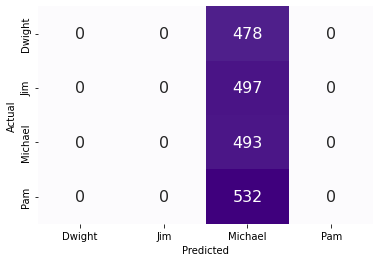

In [17]:
#Q3 - SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings)

from sklearn import svm

svc = svm.SVC(kernel='rbf')
svc.fit(ohLabelsT, trainDS.character)
predictedLabels = svc.predict(ohLabelsV)

accuSVC=accuracy_score(validationDS.character,predictedLabels)
precSVC=precision_score(validationDS.character,predictedLabels,average='macro')
reccSVC=recall_score(validationDS.character,predictedLabels,average='macro')
f1sSVC=f1_score(validationDS.character,predictedLabels,average='macro')
print("Accuracy:",f"{accuSVC:.3f}")
print("Precision:",f"{precSVC:.3f}")
print("Recall:",f"{reccSVC:.3f}")
print("F1:",f"{f1sSVC:.3f}")

plotConfusionMatrix(validationDS.character,predictedLabels)



Accuracy: 0.326
Precision: 0.337
Recall: 0.327
F1: 0.326


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

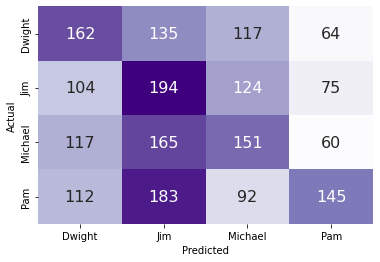

In [18]:
#Q3 - Choose a classifier

from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer()
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

kNeigh=KNeighborsClassifier().fit(matrixT,trainDS.character)
labelsPredicted=kNeigh.predict(matrixV)

accuKN=accuracy_score(validationDS.character,labelsPredicted)
precKN=precision_score(validationDS.character,labelsPredicted,average='macro')
reccKN=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sKN=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuKN:.3f}")
print("Precision:",f"{precKN:.3f}")
print("Recall:",f"{reccKN:.3f}")
print("F1:",f"{f1sKN:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

In [19]:
resTable={
    'Model':['Dummy Classifier - most_frequent','Dummy Classifier - stratified',' LogisticRegression - One-hot vectorization', 'LogisticRegression - TF-IDF vectorization','SVC Classifier - One-hot vectorization','KNeighborsClassifier - TF-IDF vectorization'],
    'Accuracy':[f"{accuDMF:.3f}",f"{accuDST:.3f}",f"{accuOHL:.3f}",f"{accuTFL:.3f}",f"{accuSVC:.3f}",f"{accuKN:.3f}"],
    'Precision':[f"{precDMF:.3f}",f"{precDST:.3f}",f"{precOHL:.3f}",f"{precTFL:.3f}",f"{precSVC:.3f}",f"{precKN:.3f}"],
    'Recall':[f"{reccDMF:.3f}",f"{reccDST:.3f}",f"{reccOHL:.3f}",f"{reccTFL:.3f}",f"{reccSVC:.3f}",f"{reccKN:.3f}"],
    'F1':[f"{f1sDMF:.3f}",f"{f1sDST:.3f}",f"{f1sOHL:.3f}",f"{f1sTFL:.3f}",f"{f1sSVC:.3f}",f"{f1sKN:.3f}"]
}

tableFrameRes=pd.DataFrame(resTable).sort_values(by='F1', ascending=False)
print('Table displaying the results for each model\n')
print(tableFrameRes.to_string(index=False))

Table displaying the results for each model

                                      Model Accuracy Precision Recall    F1
  LogisticRegression - TF-IDF vectorization    0.402     0.402  0.403 0.402
KNeighborsClassifier - TF-IDF vectorization    0.326     0.337  0.327 0.326
              Dummy Classifier - stratified    0.240     0.241  0.241 0.240
           Dummy Classifier - most_frequent    0.246     0.062  0.250 0.099
 LogisticRegression - One-hot vectorization    0.246     0.062  0.250 0.099
     SVC Classifier - One-hot vectorization    0.246     0.062  0.250 0.099


In [20]:
print('\nThe best performing classifier\n')
print('LogisticRegression - TF-IDF vectorization')
print("Accuracy:",f"{accuTFL:.3f}")
print("Precision:",f"{precTFL:.3f}")
print("Recall:",f"{reccTFL:.3f}")
print("F1:",f"{f1sTFL:.3f}")



The best performing classifier

LogisticRegression - TF-IDF vectorization
Accuracy: 0.402
Precision: 0.402
Recall: 0.403
F1: 0.402


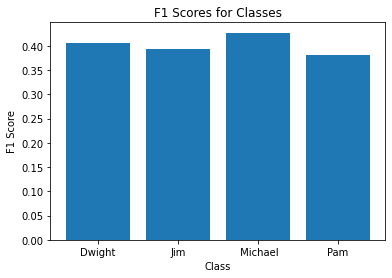

In [21]:
import matplotlib.pyplot as plot

f1sPerClass=f1_score(validationDS.character,labelsPredictedLR,average=None)

models = ['Dwight','Jim',' Michael', 'Pam']
f1Scores = [float(f"{f1sPerClass[0]:.3f}"),float(f"{f1sPerClass[1]:.3f}"),float(f"{f1sPerClass[2]:.3f}"),float(f"{f1sPerClass[3]:.3f}")]

plot.bar(models, f1Scores)
plot.ylabel('F1 Score')
plot.xlabel('Class')
plot.title('F1 Scores for Classes')
plot.show()

In [7]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {'C': [10**-3, 10**-2, 10**-1,1, 10, 10**2, 10**3,10**4,10**5], 'sublinear_tf': [False, 6250,12500,18750,25000,31250,37500,43750,50000], 'max_features': [None, 6250,12500,18750,25000,31250,37500,43750,50000]}
f1s=0
c=0
sublinear_tf=0
max_features=None
for params in ParameterGrid(param_grid):

  vectorizer = TfidfVectorizer(sublinear_tf=params['sublinear_tf'], max_features=params['max_features'])
  matrixT = vectorizer.fit_transform(trainDS.quote)
  matrixV = vectorizer.transform(validationDS.quote)

  logistReg=LogisticRegression(C=params['C'], random_state=42).fit(matrixT,trainDS.character)
  labelsPredicted=logistReg.predict(matrixV)

  f1=f1_score(validationDS.character,labelsPredicted,average='macro')
  if f1 > f1s:
    f1s=f1
    c=params['C']
    sublinear_tf=params['sublinear_tf']
    max_features=params['max_features']
print(f"{f1s:.3f}") 
print(c)
print(sublinear_tf)
print(max_features)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear

0.409
1
6250
6250


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.409
Precision: 0.409
Recall: 0.410
F1: 0.409


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

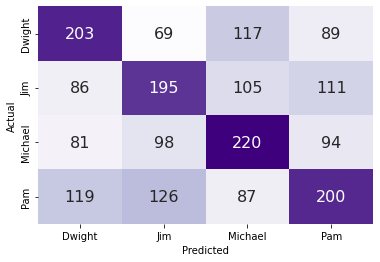

In [10]:
# Results using output of above function

vectorizer = TfidfVectorizer(sublinear_tf=6250, max_features=6250)
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

logistReg=LogisticRegression(C=1, random_state=42).fit(matrixT,trainDS.character)
labelsPredicted=logistReg.predict(matrixV)

accuParam=accuracy_score(validationDS.character,labelsPredicted)
precParam=precision_score(validationDS.character,labelsPredicted,average='macro')
reccParam=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sParam=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuParam:.3f}")
print("Precision:",f"{precParam:.3f}")
print("Recall:",f"{reccParam:.3f}")
print("F1:",f"{f1sParam:.3f}")

plotConfusionMatrix(validationDS.character,labelsPredicted)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Accuracy: 0.409
Precision: 0.410
Recall: 0.410
F1: 0.410


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

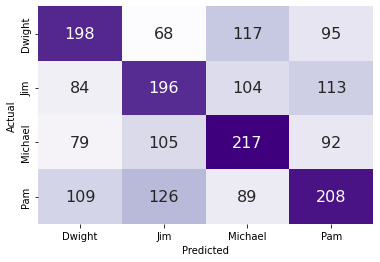

In [56]:
#Results now with added max_df param and some more tuning

vectorizer = TfidfVectorizer(sublinear_tf=6250, max_features=6250, max_df=0.4)
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixV = vectorizer.transform(validationDS.quote)

logistReg=LogisticRegression(C=1.8, random_state=42).fit(matrixT,trainDS.character)
labelsPredicted=logistReg.predict(matrixV)

accuParam=accuracy_score(validationDS.character,labelsPredicted)
precParam=precision_score(validationDS.character,labelsPredicted,average='macro')
reccParam=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sParam=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuParam:.3f}")
print("Precision:",f"{precParam:.3f}")
print("Recall:",f"{reccParam:.3f}")
print("F1:",f"{f1sParam:.3f}")


plotConfusionMatrix(validationDS.character,labelsPredicted)

In [57]:
resTableParam={
    'State':['Before Tuning','After Tuning'],
    'Accuracy':[f"{accuTFL:.3f}",f"{accuParam:.3f}"],
    'Precision':[f"{precTFL:.3f}",f"{precParam:.3f}"],
    'Recall':[f"{reccTFL:.3f}",f"{reccParam:.3f}"],
    'F1':[f"{f1sTFL:.3f}",f"{f1sParam:.3f}"]
}

tableFrameRes=pd.DataFrame(resTableParam)
print('Table displaying the results for each model\n')
print(tableFrameRes.to_string(index=False))

Table displaying the results for each model

        State Accuracy Precision Recall    F1
Before Tuning    0.402     0.402  0.403 0.402
 After Tuning    0.409     0.410  0.410 0.410


In [91]:
#Was getting error - NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968 so found fix  on site:stackoverflow.com
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [92]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━

In [93]:
from transformers import pipeline

pipe = pipeline('feature-extraction', model="xlm-roberta-base")
vecs=[]
for q in trainDS.quote.array:
  vec=pipe(q, return_tensors='pt')[0,0,:]
  vecs.append(vec)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
pipe = pipeline('feature-extraction', model="xlm-roberta-base")
vecsV=[]
for q in validationDS.quote.array:
  vec=pipe(q, return_tensors='pt')[0,0,:]
  vecsV.append(vec)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
import torch
tensor=torch.stack(vecs)
print(tensor.shape)
tensorV=torch.stack(vecsV)
print(tensorV.shape)

torch.Size([6000, 768])
torch.Size([2000, 768])


Accuracy: 0.395
Precision: 0.395
Recall: 0.396
F1: 0.393


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


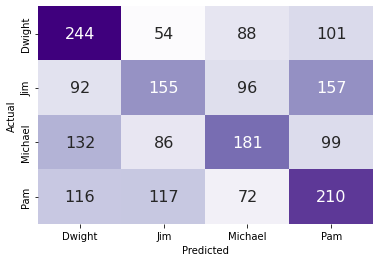

In [31]:
logistReg=LogisticRegression(random_state=42).fit(tensor,trainDS.character)
labelsPredicted=logistReg.predict(tensorV)

accuRob=accuracy_score(validationDS.character,labelsPredicted)
precRob=precision_score(validationDS.character,labelsPredicted,average='macro')
reccRob=recall_score(validationDS.character,labelsPredicted,average='macro')
f1sRob=f1_score(validationDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuRob:.3f}")
print("Precision:",f"{precRob:.3f}")
print("Recall:",f"{reccRob:.3f}")
print("F1:",f"{f1sRob:.3f}")


plotConfusionMatrix(validationDS.character,labelsPredicted)

In [94]:
from transformers import TrainingArguments, Trainer

lRate=1**-4
epochs=1
batch=16
wDecay=0.0

trainingArgs= TrainingArguments(
    output_dir="office-predictor",
    evaluation_strategy="epoch",
    learning_rate=lRate,
    per_device_train_batch_size=batch,
    per_device_eval_batch_size=batch,
    num_train_epochs=epochs,
    weight_decay=wDecay,

)

In [33]:
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained('roberta-base')

from datasets import Dataset

trainDSL=trainDS
trainDSL=trainDSL.rename(columns={'character':'label'})
validDSL=validationDS
validDSL=validDSL.rename(columns={'character':'label'})

trainDSL['label']=trainDSL['label'].replace('Michael',0)
trainDSL['label']=trainDSL['label'].replace('Jim',1)
trainDSL['label']=trainDSL['label'].replace('Dwight',2)
trainDSL['label']=trainDSL['label'].replace('Pam',3)


validDSL['label']=validDSL['label'].replace('Michael',0)
validDSL['label']=validDSL['label'].replace('Jim',1)
validDSL['label']=validDSL['label'].replace('Dwight',2)
validDSL['label']=validDSL['label'].replace('Pam',3)

trainDataset=Dataset.from_pandas(trainDSL)
validationDataset=Dataset.from_pandas(validDSL)

def tokenize(row):
  res = tokenizer(row['quote'], padding="max_length", max_length=500, truncation=True )
  return res

tokTrain = trainDataset.map(tokenize, batched=True)
tokValid = validationDataset.map(tokenize, batched=True)



Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [34]:
trainDSL

,quote,label
0,Dwight lives on a beet farm and he practices k...,1
1,Oh I am. In my own words.,2
2,"Um, sort of a spy, thriller…",0
3,That’s what she said! That’s what she said! Th...,3
4,Yes! Five bucks each. And it was totally worth...,1
...,...,...
5995,"Stanley, are you listening to music?",1
5996,"Here is my card. It’s got my Cell number, my p...",2
5997,That is by far the best way to strengthen your...,0
5998,"Yeah, yeah. Lovely. Thank you.",0


In [98]:
id2label = {0: "Michael", 1: "Jim", 2: "Dwight", 3: "Pam"}
label2id = {"Michael": 0, "Jim": 1, "Dwight":2, "Pam":3}

In [36]:
tokTrain

Dataset({
    features: ['quote', 'label', 'input_ids', 'attention_mask'],
    num_rows: 6000
})

In [37]:
from transformers import DataCollatorForTokenClassification
from transformers import AutoModelForMaskedLM
from transformers import set_seed
from transformers import RobertaTokenizer, RobertaModel, AutoModelForSequenceClassification
from transformers import DataCollatorForTokenClassification

set_seed(42)

model = AutoModelForSequenceClassification.from_pretrained('roberta-base',num_labels=4, id2label=id2label, label2id=label2id)

trainer = Trainer(
    model=model,
    args=trainingArgs,
    train_dataset=tokTrain,
    eval_dataset=tokValid,
    tokenizer=tokenizer,
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [38]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6000
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 375
  Number of trainable parameters = 124648708
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than usi

Epoch,Training Loss,Validation Loss
1,No log,9.317381


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=375, training_loss=106.58989583333333, metrics={'train_runtime': 588.6483, 'train_samples_per_second': 10.193, 'train_steps_per_second': 0.637, 'total_flos': 1541694024000000.0, 'train_loss': 106.58989583333333, 'epoch': 1.0})

In [45]:
predictions, label_ids, metrics = trainer.predict(tokValid)

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 16


In [46]:
print(predictions[0])
print(label_ids[0])
print(predictions[1])
print(label_ids[3])

print(predictions.argmax(-1))



[405.54388 405.34674 420.70856 414.1083 ]
3
[405.54388 405.34674 420.70856 414.1083 ]
0
[2 2 2 ... 2 2 2]


Accuracy: 0.243
Precision: 0.061
Recall: 0.250
F1: 0.098


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


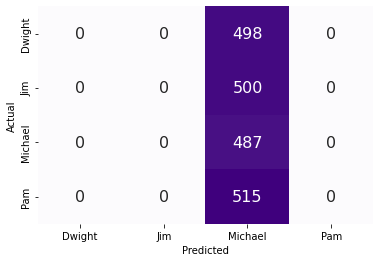

In [47]:
accuE2e=accuracy_score(label_ids,predictions.argmax(-1))
precE2e=precision_score(label_ids,predictions.argmax(-1),average='macro')
reccE2e=recall_score(label_ids,predictions.argmax(-1),average='macro')
f1sE2e=f1_score(label_ids,predictions.argmax(-1),average='macro')
print("Accuracy:",f"{accuE2e:.3f}")
print("Precision:",f"{precE2e:.3f}")
print("Recall:",f"{reccE2e:.3f}")
print("F1:",f"{f1sE2e:.3f}")


plotConfusionMatrix(label_ids,predictions.argmax(-1))

In [20]:
from transformers import TrainingArguments, Trainer

lRate=1**-6
epochs=10
batch=16
wDecay=0.0

trainingArgs= TrainingArguments(
    output_dir="office-predictor",
    evaluation_strategy="epoch",
    learning_rate=lRate,
    per_device_train_batch_size=batch,
    per_device_eval_batch_size=batch,
    num_train_epochs=epochs,
    weight_decay=wDecay,

)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [21]:
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

from datasets import Dataset

trainDSL=trainDS
trainDSL=trainDSL.rename(columns={'character':'label'})
validDSL=validationDS
validDSL=validDSL.rename(columns={'character':'label'})

trainDSL['label']=trainDSL['label'].replace('Michael',0)
trainDSL['label']=trainDSL['label'].replace('Jim',1)
trainDSL['label']=trainDSL['label'].replace('Dwight',2)
trainDSL['label']=trainDSL['label'].replace('Pam',3)


validDSL['label']=validDSL['label'].replace('Michael',0)
validDSL['label']=validDSL['label'].replace('Jim',1)
validDSL['label']=validDSL['label'].replace('Dwight',2)
validDSL['label']=validDSL['label'].replace('Pam',3)

trainDataset=Dataset.from_pandas(trainDSL)
validationDataset=Dataset.from_pandas(validDSL)

def tokenize(row):
  res = tokenizer(row['quote'], padding="max_length", max_length=500, truncation=True )
  return res

tokTrain = trainDataset.map(tokenize, batched=True)
tokValid = validationDataset.map(tokenize, batched=True)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.26.1",
  "vocab_size": 30522
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapsh

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [22]:
from transformers import DataCollatorForTokenClassification
from transformers import set_seed
from transformers import RobertaTokenizer, RobertaModel, AutoModelForSequenceClassification

from transformers import DataCollatorForTokenClassification

# data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

set_seed(42)

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=4, id2label=id2label, label2id=label2id)

trainer = Trainer(
    model=model,
    args=trainingArgs,
    train_dataset=tokTrain,
    eval_dataset=tokValid,
    tokenizer=tokenizer,
    # data_collator=data_collator,
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Michael",
    "1": "Jim",
    "2": "Dwight",
    "3": "Pam"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Dwight": 2,
    "Jim": 1,
    "Michael": 0,
    "Pam": 3
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.26.1",
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--dist

In [23]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 6000
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3750
  Number of trainable parameters = 66956548
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,No log,1.502512
2,3434.363000,1.450835
3,1.460400,1.397990
4,1.454900,1.430556
5,1.454900,1.450965
6,1.428500,1.424845
7,1.416900,1.416584
8,1.409200,1.387381
9,1.409200,1.422746
10,1.398800,1.387767


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16
Saving model checkpoint to office-predictor/checkpoint-500
Configuration saved in office-predictor/checkpoint-500/config.json
Model weights saved in office-predictor/checkpoint-500/pytorch_model.bin
tokenizer config file saved in office-predictor/checkpoint-500/tokenizer_config.json
Special tokens file saved in office-predictor/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Ev

TrainOutput(global_step=3750, training_loss=459.15016939290365, metrics={'train_runtime': 2689.4282, 'train_samples_per_second': 22.31, 'train_steps_per_second': 1.394, 'total_flos': 7762038480000000.0, 'train_loss': 459.15016939290365, 'epoch': 10.0})

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 16


Accuracy: 0.248
Precision: 0.062
Recall: 0.250
F1: 0.100


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

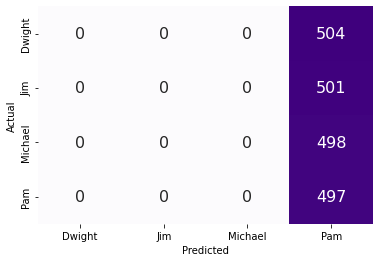

In [24]:
predictions, label_ids, metrics = trainer.predict(tokValid)
accuE2e=accuracy_score(label_ids,predictions.argmax(-1))
precE2e=precision_score(label_ids,predictions.argmax(-1),average='macro')
reccE2e=recall_score(label_ids,predictions.argmax(-1),average='macro')
f1sE2e=f1_score(label_ids,predictions.argmax(-1),average='macro')
print("Accuracy:",f"{accuE2e:.3f}")
print("Precision:",f"{precE2e:.3f}")
print("Recall:",f"{reccE2e:.3f}")
print("F1:",f"{f1sE2e:.3f}")


plotConfusionMatrix(label_ids,predictions.argmax(-1))

In [14]:
from transformers import TrainingArguments, Trainer

lRate=1**-3
epochs=10
batch=16
wDecay=0.0

trainingArgs= TrainingArguments(
    output_dir="office-predictor",
    evaluation_strategy="epoch",
    learning_rate=lRate,
    per_device_train_batch_size=batch,
    per_device_eval_batch_size=batch,
    num_train_epochs=epochs,
    weight_decay=wDecay,

)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [15]:
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained('roberta-base')

from datasets import Dataset

trainDSL=trainDS
trainDSL=trainDSL.rename(columns={'character':'label'})
validDSL=validationDS
validDSL=validDSL.rename(columns={'character':'label'})

trainDSL['label']=trainDSL['label'].replace('Michael',0)
trainDSL['label']=trainDSL['label'].replace('Jim',1)
trainDSL['label']=trainDSL['label'].replace('Dwight',2)
trainDSL['label']=trainDSL['label'].replace('Pam',3)


validDSL['label']=validDSL['label'].replace('Michael',0)
validDSL['label']=validDSL['label'].replace('Jim',1)
validDSL['label']=validDSL['label'].replace('Dwight',2)
validDSL['label']=validDSL['label'].replace('Pam',3)

trainDataset=Dataset.from_pandas(trainDSL)
validationDataset=Dataset.from_pandas(validDSL)

def tokenize(row):
  res = tokenizer(row['quote'], padding="max_length", max_length=500, truncation=True )
  return res

tokTrain = trainDataset.map(tokenize, batched=True)
tokValid = validationDataset.map(tokenize, batched=True)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/ff46155979338ff8063cdad90908b498ab91b181/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file vocab.json from cache at /root/.cache/huggingface/hub/mo

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [16]:
from transformers import DataCollatorForTokenClassification
from transformers import set_seed
from transformers import RobertaTokenizer, RobertaModel, AutoModelForSequenceClassification
from transformers import DataCollatorForTokenClassification

set_seed(42)

model = AutoModelForSequenceClassification.from_pretrained('roberta-base',num_labels=4, id2label=id2label, label2id=label2id)

trainer = Trainer(
    model=model,
    args=trainingArgs,
    train_dataset=tokTrain,
    eval_dataset=tokValid,
    tokenizer=tokenizer,
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/ff46155979338ff8063cdad90908b498ab91b181/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Michael",
    "1": "Jim",
    "2": "Dwight",
    "3": "Pam"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Dwight": 2,
    "Jim": 1,
    "Michael": 0,
    "Pam": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size

In [17]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6000
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3750
  Number of trainable parameters = 124648708
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than u

Epoch,Training Loss,Validation Loss
1,No log,90.589920
2,186.334700,73.537132
3,110.121600,31.795685
4,109.924600,77.791679
5,109.924600,63.546280
6,88.507400,59.017838
7,62.568100,43.045288
8,44.498400,24.983711
9,44.498400,13.605523
10,25.689500,2.070846


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16
Saving model checkpoint to office-predictor/checkpoint-500
Configuration saved in office-predictor/checkpoint-500/config.json
Model weights saved in office-predictor/checkpoint-500/pytorch_model.bin
tokenizer config file saved in office-predictor/checkpoint-500/tokenizer_config.json
Special tokens file saved in office-predictor/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation ***

TrainOutput(global_step=3750, training_loss=84.6095662109375, metrics={'train_runtime': 5919.6645, 'train_samples_per_second': 10.136, 'train_steps_per_second': 0.633, 'total_flos': 1.541694024e+16, 'train_loss': 84.6095662109375, 'epoch': 10.0})

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 16


Accuracy: 0.271
Precision: 0.068
Recall: 0.250
F1: 0.106


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

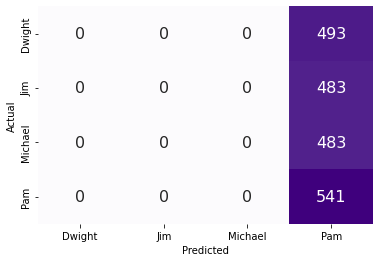

In [18]:
predictions, label_ids, metrics = trainer.predict(tokValid)
accuE2e=accuracy_score(label_ids,predictions.argmax(-1))
precE2e=precision_score(label_ids,predictions.argmax(-1),average='macro')
reccE2e=recall_score(label_ids,predictions.argmax(-1),average='macro')
f1sE2e=f1_score(label_ids,predictions.argmax(-1),average='macro')
print("Accuracy:",f"{accuE2e:.3f}")
print("Precision:",f"{precE2e:.3f}")
print("Recall:",f"{reccE2e:.3f}")
print("F1:",f"{f1sE2e:.3f}")


plotConfusionMatrix(label_ids,predictions.argmax(-1))

In [95]:
from transformers import TrainingArguments, Trainer

lRate=1**-1
epochs=3
batch=16
wDecay=0.6

trainingArgs= TrainingArguments(
    output_dir="office-predictor",
    evaluation_strategy="epoch",
    learning_rate=lRate,
    per_device_train_batch_size=batch,
    per_device_eval_batch_size=batch,
    num_train_epochs=epochs,
    weight_decay=wDecay,

)

In [96]:
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained('roberta-base')

from datasets import Dataset

trainDSL=trainDS
trainDSL=trainDSL.rename(columns={'character':'label'})
validDSL=validationDS
validDSL=validDSL.rename(columns={'character':'label'})

trainDSL['label']=trainDSL['label'].replace('Michael',0)
trainDSL['label']=trainDSL['label'].replace('Jim',1)
trainDSL['label']=trainDSL['label'].replace('Dwight',2)
trainDSL['label']=trainDSL['label'].replace('Pam',3)


validDSL['label']=validDSL['label'].replace('Michael',0)
validDSL['label']=validDSL['label'].replace('Jim',1)
validDSL['label']=validDSL['label'].replace('Dwight',2)
validDSL['label']=validDSL['label'].replace('Pam',3)

trainDataset=Dataset.from_pandas(trainDSL)
validationDataset=Dataset.from_pandas(validDSL)

def tokenize(row):
  res = tokenizer(row['quote'], padding="max_length", max_length=500, truncation=True )
  return res

tokTrain = trainDataset.map(tokenize, batched=True)
tokValid = validationDataset.map(tokenize, batched=True)

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [99]:
from transformers import DataCollatorForTokenClassification
from transformers import set_seed
from transformers import RobertaTokenizer, RobertaModel, AutoModelForSequenceClassification
from transformers import DataCollatorForTokenClassification

set_seed(42)

model = AutoModelForSequenceClassification.from_pretrained('roberta-base',num_labels=4, id2label=id2label, label2id=label2id)

trainer = Trainer(
    model=model,
    args=trainingArgs,
    train_dataset=tokTrain,
    eval_dataset=tokValid,
    tokenizer=tokenizer,
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [100]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6000
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1125
  Number of trainable parameters = 124648708
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than us

Epoch,Training Loss,Validation Loss
1,No log,32.838203
2,29.176300,25.019831
3,23.665000,1.517250


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16
Saving model checkpoint to office-predictor/checkpoint-500
Configuration saved in office-predictor/checkpoint-500/config.json
Model weights saved in office-predictor/checkpoint-500/pytorch_model.bin
tokenizer config file saved in office-predictor/checkpoint-500/tokenizer_config.json
Special tokens file saved in office-predictor/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation ***

TrainOutput(global_step=1125, training_loss=24.279833984375, metrics={'train_runtime': 1713.1303, 'train_samples_per_second': 10.507, 'train_steps_per_second': 0.657, 'total_flos': 4625082072000000.0, 'train_loss': 24.279833984375, 'epoch': 3.0})

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: quote. If quote are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 16


Accuracy: 0.234
Precision: 0.059
Recall: 0.250
F1: 0.095


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

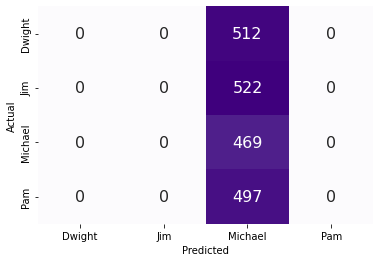

In [101]:
predictions, label_ids, metrics = trainer.predict(tokValid)
accuE2e=accuracy_score(label_ids,predictions.argmax(-1))
precE2e=precision_score(label_ids,predictions.argmax(-1),average='macro')
reccE2e=recall_score(label_ids,predictions.argmax(-1),average='macro')
f1sE2e=f1_score(label_ids,predictions.argmax(-1),average='macro')
print("Accuracy:",f"{accuE2e:.3f}")
print("Precision:",f"{precE2e:.3f}")
print("Recall:",f"{reccE2e:.3f}")
print("F1:",f"{f1sE2e:.3f}")


plotConfusionMatrix(label_ids,predictions.argmax(-1))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Accuracy: 0.413
Precision: 0.413
Recall: 0.413
F1: 0.413


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

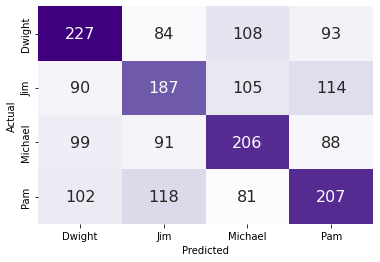

In [58]:
## Best approach is still logistic regression with tf-idf

vectorizer = TfidfVectorizer(sublinear_tf=6250, max_features=6250, max_df=0.4)
matrixT = vectorizer.fit_transform(trainDS.quote)
matrixTest = vectorizer.transform(testDS.quote)

logistReg=LogisticRegression(C=1.8, random_state=42).fit(matrixT,trainDS.character)
labelsPredicted=logistReg.predict(matrixTest)

accuTest=accuracy_score(testDS.character,labelsPredicted)
precTest=precision_score(testDS.character,labelsPredicted,average='macro')
reccTest=recall_score(testDS.character,labelsPredicted,average='macro')
f1sTest=f1_score(testDS.character,labelsPredicted,average='macro')
print("Accuracy:",f"{accuTest:.3f}")
print("Precision:",f"{precTest:.3f}")
print("Recall:",f"{reccTest:.3f}")
print("F1:",f"{f1sTest:.3f}")


plotConfusionMatrix(testDS.character,labelsPredicted)

In [69]:
print(testDS[:10].quote, testDS[:10].character)
print(labelsPredicted[:10])

0    Ok, fine. Tit for tit. Give it your best shot....
1    Oh, it’s Creed’s birthday today. Should we get...
2                  Just wait and send it to voicemail.
3    This is not funny. This is totally unprofessio...
4    I’m not going to help you. Why would you choos...
5                  Nobody better try to stop me. Good.
6    You know, she also said the waiting list is li...
7                         Who eats eight protein bars?
8               Just drive faster. I want to get back.
9    What are you doing? What do you expect me to s...
Name: quote, dtype: object 0     Dwight
1        Pam
2     Dwight
3     Dwight
4     Dwight
5    Michael
6        Pam
7    Michael
8    Michael
9        Pam
Name: character, dtype: object
['Michael' 'Pam' 'Pam' 'Dwight' 'Dwight' 'Michael' 'Dwight' 'Dwight' 'Pam'
 'Michael']
